In [17]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

def th(s, ro, u, mu, momth, A):
    return s * 0.0575 * momth ** (-0.8) * (ro * u * s / mu) ** (-0.2) * A

def A (M, Tw_fact):
    return (1 + 0.15 * M ** 2) ** 0.6 / (1 + 0.375 * 0.3 * M ** 2) ** 1.05 * Tw_fact ** 0.6 * (2 / (1 + Tw_fact)) ** 1.05

def momth(z, M, Tw_fact):
    sum = 0
    for i in range(1,len(z)):
        sum += 7 / 2 * (z[i] - z[i - 1]) * (((z[i] ** 7 - z[i] ** 8) / ((1 + 0.15 * M ** 2) * ((1 - Tw_fact) * z[i] + Tw_fact) - 0.15 * M ** 2 * z[i] ** 2)) \
                                            + ((z[i - 1] ** 7 - z[i - 1] ** 8) / ((1 + 0.15 * M ** 2) * ((1 - Tw_fact) * z[i - 1] + Tw_fact) - 0.15 * M ** 2 * z[i - 1] ** 2)))
    return sum

def starT(T, M):
    return T * (1 + 0.72 ** (1 / 3) * 0.15 * M ** 2)
        
def mu(T):
    return 18.27e-6 * (411.15) / (T + 120) * (T / 291.15) ** (3 / 2)

def Tw_fact(T, M):
    global Tw
    return Tw / (T * (1 + (0.72) ** (1 / 3) * 0.15 * M ** 2))

def toMach(u, T, p, ro):
    #return u / m.sqrt(373.1 * T)
    return u / m.sqrt(1.3 * p / ro)

def xni(th, momth, A, ro, u, mu):
    return (th / (0.0575 * momth ** (-0.8) * A) * (ro * u / mu) ** 0.2) ** (5 / 4)

def Rex(ro, u, xni, mu):
    return(ro * u * xni / mu)

def cf(Rex, momth, A):
    return 0.0922 * A * momth ** 0.2 / (Rex ** 0.2)

z = [float(i) / 100 for i in range(101)]
p_data = []
s = [0.0]
u = []
p = []
T = []
Tw = 900
ro = []
x = []
y = []
M = []
T_w =[]
delta = [0.0]
cap = 1.3
#R = 8.31 / 0.029
R = 287
cp = 36.01
M.append(1.01)
flag = True
p.append(14.8*98066.5 /(1 + 0.15 * M[0] ** 2) ** (1.3 / 0.3))
T.append(1650 / (1 + 0.15 * M[0] ** 2))
u.append(m.sqrt(373.1 * T[0])*M[0])
ro.append(p[0] / (R * T[0]))
#p.append(783124.6777770185)
#u.append(734.341047899402)
#T.append(1431.0308192000973)
#ro.append(1.9067775321445863)
print(p[0], u[0] , T[0], ro[0])
file = open("wall_int.txt")
for line in file:
    buf = line.split();
    if len(buf) > 1:
        x.append(float(buf[0]))
        y.append(float(buf[1]))       
file.close()        
file = open("p225_int.txt")
for line in file:
    buf = line.split();
    if len(buf) > 1:
        p_data.append(float(buf[1]) * 98066.5)
file.close()
file = open("t_int.txt")
for line in file:
    buf = line.split();
    if len(buf) > 1:
        T_w.append(float(buf[1]))       
file.close()  
for i in range(1, len(y)):
    buf = m.sqrt((y[i] - y[i-1]) ** 2 + (x[i] - x[i - 1]) ** 2)
    s.append(s[i-1] + buf)
i = 1    
while x[i] <= 0.145:
    сur_mu = mu(T[i - 1])
    cur_Tw_fact = Tw_fact(T[i - 1], M[i - 1])
    cur_A = A(M[i - 1], cur_Tw_fact)
    cur_momth = momth(z, M[i - 1], cur_Tw_fact)
    cur_th = th(s[i], ro[i - 1], u[i - 1], сur_mu, cur_momth, cur_A)
    delta.append(cur_th)
    cur_xni = xni(delta[i - 1], cur_momth, cur_A, ro[i - 1], u[i - 1], сur_mu)
    cur_Rex = Rex(ro[i - 1], u[i - 1], cur_xni, сur_mu)
    if i == 1:
        cur_cf = 0
    else:
        cur_cf = cf(cur_Rex, cur_momth, cur_A)
    cur_starT = starT(T[i - 1], M[i - 1])
    #q_x = (cur_cf * (cur_starT - Tw) * (x[i] - x[i - 1])) / (4 * T[i - 1] * y[i - 1])
    frict = ((x[i] - x[i - 1]) * cur_cf * ro[i - 1] * u[i - 1] ** 2) / (4 * p[i - 1] * abs(y[i - 1]))
    area = y[i] / y[i - 1] - 1
    buf = u[i - 1] * (1 - 1 / (1 - M[i - 1] ** 2) * (area - frict))
    u.append(buf)
    buf = p[i - 1] * (1 + cap * M[i - 1] ** 2 / (1 - M[i - 1] ** 2) * (area - ((1 + (cap - 1) * M[i - 1] ** 2) / (cap * M[i - 1] ** 2)) * frict))
    p.append(buf)
    #print(M[i-1]**2)
    buf = T[i - 1] * (1 + 1 / (1 - M[i - 1] ** 2) * ((cap - 1) * M[i - 1] ** 2 * area - (cap - 1) * M[i - 1] ** 2 * frict))
    T.append(buf)
    #print(T[i])
    buf = ro[i - 1] * (1 + 1 / (1 - M[i - 1] ** 2) * (M[i - 1] ** 2 * area - frict))
    ro.append(buf)
    M.append(toMach(u[i], T[i], p[i], ro[i]))
    if ((i - 1) % 500 == 0):
        print(i - 1, ": ", p[i-1], " ", u[i-1], " ", T[i-1], " ", ro[i-1])
#    if(i <= 2):
#        print(i - 1,": area, cf, frict: ", area, cur_cf, frict)
#        print("xni:", cur_xni)
#        print("A:", cur_A)
#        print("dss/d: ", cur_momth)
#    else:
#        break
    i += 1
#print(M[i - 1])
print("Here")  
while i <= len(y) - 2:
    """
    if x[i - 1] >= 0.325 and flag:
        flag = False
        G = ro[i - 1] * u[i - 1] * 2 * abs(y[i - 1]) * ( 1 + 1 / (14.8 * 3.2))
        print("G ", G)
        I = ro[i - 1] * u[i - 1] ** 2 + p_data[i - 1]
        print("I ", I)
        H = ro[i - 1] * u[i - 1] * 2 * abs(y[i - 1]) * ((0.5 * u[i - 1] ** 2 + 1.3 * p[i - 1] / (0.3 * ro[i - 1])) + 1.24  * 297 * 290 / (14.5 * 3.2 * (0.24)))
        print("H ", H)
        b1 = -1 * (8 / 3)
        b2 = 1.3 * 2 * abs(y[i - 1]) * I / (0.3 * G)
        b3 = (-1) *  H / G
        u[i - 1] = (-b2 - m.sqrt(b2 ** 2 - 4 * b1 * b3)) / (2 * b1)
        ro[i - 1] = G / (u[i - 1] * 2 * abs(y[i - 1]))
        p_data[i - 1] = I - ro[i - 1] * u[i - 1] ** 2
        T[i - 1] = T[i - 1]
        print(i, p_data[i - 1], u[i - 1], T[i - 1], ro[i - 1], sep = " ")   
    """
    сur_mu = mu(T[i - 1])
    if T_w[i] == 0:
        cur_Tw_fact = Tw_fact(T[i - 1], M[i - 1])
    else:
        cur_Tw_fact = T_w[i] + 273.3
    cur_A = A(M[i - 1], cur_Tw_fact)
    cur_momth = momth(z, M[i - 1], cur_Tw_fact)
    cur_th = th(s[i], ro[i - 1], u[i - 1], сur_mu, cur_momth, cur_A)
    delta.append(cur_th)
    cur_xni = xni(delta[i - 1], cur_momth, cur_A, ro[i - 1], u[i - 1], сur_mu)
    cur_Rex = Rex(ro[i - 1], u[i - 1], cur_xni, сur_mu)
    cur_cf = cf(cur_Rex, cur_momth, cur_A)
    cur_starT = starT(T[i - 1], M[i - 1])
    frict = ((x[i] - x[i - 1]) * cur_cf * ro[i - 1] * u[i - 1] ** 2) / (4 * p[i - 1] * abs(y[i - 1]))
    area = y[i] / y[i - 1] - 1
    #print(i, " ", p_data[i + 1])
    if i < 7578:
        q_x = (cur_cf * (cur_starT - Tw) * (x[i] - x[i - 1])) / (4 * T[i - 1] * abs(y[i - 1]))
    else:
        #print("Hernya tut -->", p_data[i] - 1)
        q_x = -1 * (area - (1 + 0.3 * M[i - 1] ** 2) / (1.3 * M[i - 1] ** 2) * frict - (1 - M[i - 1] ** 2) / (1.3 * M[i - 1] ** 2) *(p_data[i + 1] - p_data[i - 1]) / (2 * p_data[i])) 
    #print(i," ", q_x)
    buf = u[i - 1] * (1 - 1 / (1 - M[i - 1] ** 2) * (area + q_x - frict))
    u.append(buf)
    if i < 7578:
        buf = p[i - 1] * (1 + cap * M[i - 1] ** 2 / (1 - M[i - 1] ** 2) * (area + q_x - ((1 + (cap - 1) * M[i -1] ** 2) / (cap * M[i -1] ** 2)) * frict))
    else:
        buf = p_data[i]
    p.append(buf)
    buf = T[i - 1] * (1 + 1 / (1 - M[i - 1] ** 2) * ((cap - 1) * M[i - 1] ** 2 * area - (1 - cap * M[i - 1] ** 2) * q_x - (cap - 1) * M[i - 1] ** 2 * frict))
    T.append(buf)
    #print(T[i])
    buf = ro[i - 1] * (1 + 1 / (1 - M[i - 1] ** 2) * (M[i - 1] ** 2 * area + q_x - frict))
    ro.append(buf)
    M.append(toMach(u[i], T[i], p[i], ro[i]))
    if ((i - 1) % 500 == 0):
        print(i - 1, ": ", p[i-1], " ", u[i-1], " ", T[i-1], " ", ro[i-1])
    #print((cap * M[i - 1] ** 2 - 1) * q_x," ", (cap - 1) * M[i - 1] ** 2 * frict)
    if x[i] >= 0.325 and flag:
        flag = False
        G = ro[i] * u[i] * 2 * abs(y[i]) * 0.1 * ( 1 + 1 / (14.8 * 3.2))
#        G = ro[i] * u[i] * y[i] * ( 1 + 1 / (14.8 * 3.2))
        print("G ", G)
        I = ro[i] * u[i] ** 2 + p[i]
        print("I ", I)
        H = ro[i] * u[i] * 2 * abs(y[i]) * 0.1 * ((0.5 * u[i] ** 2 + 1.3 * p[i] / (0.3 * ro[i])) + 1.24  * 297 * 290 / (14.5 * 3.2 * (0.24)))
#        H = ro[i] * u[i]  * y[i] * ((0.5 * u[i] ** 2 + 1.3 * p[i] / (0.3 * ro[i])) + 1.24  * 297 * 290 / (14.5 * 3.2 * (0.24)))
        print("H ", H)
#        b1 = -1 * (8 / 3)
        b1 = 0.5 - 1.3/0.3
        b2 = 1.3 * 2 * abs(y[i]) * 0.1 * I / (0.3 * G)
#        b2 = 1.3 * y[i] * I / (0.3 * G)
        b3 = (-1) *  H / G
        u[i] = (-b2 - m.sqrt(b2 ** 2 - 4 * b1 * b3)) / (2 * b1)
        ro[i] = G / (u[i] * 2 * abs(y[i]) * 0.1)
#        ro[i] = G / (u[i] * y[i])
        p_data[i] = I - ro[i] * u[i] ** 2
        #print(i - 1, ": ", p[i-1], " ", u[i-1], " ", T[i-1], " ", ro[i-1])   
    i += 1
print("End")    

783124.6777770184 738.0036194872569 1431.0308192000973 1.9067775321445861
0 :  783124.6777770184   738.0036194872569   1431.0308192000973   1.9067775321445861
500 :  274959.4493788061   1141.4391284799358   1126.838967955451   0.8511889800725092
1000 :  178085.1378879786   1251.234164981162   1021.2324836608997   0.6083473316373836
1500 :  135401.56988077323   1310.4604432705066   960.2384740192448   0.4919315860384314
2000 :  113431.48610986499   1345.157511997022   923.194906430978   0.42865225440324073
2500 :  101591.4771684141   1365.2692333919201   901.2796616573743   0.3932461042570191
3000 :  94883.42228619164   1376.9762128284005   888.3730163516609   0.37261677079758293
3500 :  91702.37313135725   1382.2337322131557   882.5408513096373   0.3625044517605156
4000 :  91076.38974388342   1382.505142662303   882.2391722711259   0.3601530231435386
Here
4500 :  91143.45155489093   1381.413866153824   883.3534777319219   0.3599635630303644
5000 :  91335.32915700662   1380.092810676470

46000 :  182116.052853552   1037.1391013662358   2144.7835943813393   0.287967350181594
46500 :  173135.58623143463   1066.0834982445751   2095.920435403594   0.2801485499592722
47000 :  164155.11960931736   1095.0208127422823   2041.1400721586974   0.2727448777302545
47500 :  155174.65298719992   1123.9511922365364   1980.4448933815745   0.2657240932863274
48000 :  146194.18636508254   1152.8748239992024   1913.8372917394147   0.2590572016806692
48500 :  137213.71974296527   1181.792437116084   1843.33734041002   0.2524414228527375
49000 :  128233.25312084785   1211.2369291613907   1825.5234462432759   0.23821968933443716
49500 :  119252.7864987306   1241.679500809988   1797.4582860724554   0.22499367600730286
End


In [13]:
wr = open(r"n1.txt", "w")
for i in range(-1, 50000, 500):
    if i < 0:
            wr.write(str(p[0]) + " " + str(u[0]) + " " + str(T[0]) + " " + str(ro[0]) + "\n")
    elif i >=49999:        
        wr.write(str(p[-1]) + " " + str(u[-1]) + " " + str(T[-1]) + " " + str(ro[-1]) + "\n")
    else:
        wr.write(str(p[i]) + " " + str(u[i]) + " " + str(T[i]) + " " + str(ro[i]) + "\n")
wr.close() 

In [18]:
for i in range(len(y)):
    if i % 500 == 0:
        print(abs(y[i]))

0.005319982
0.007679458707767822
0.009800293654627392
0.011570913477969045
0.012936115595932541
0.01389292764267913
0.01453735643342899
0.014886027775472158
0.014980274924622504
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.014999999664724
0.015192695876999313
0.015481451665373413
0.01577020745374835
0.01605896324212228
0.016347719030497056
0.016636474818871316
0.016925230607274806
0.017213986395708383
0.017502742184141842
0.017791497972575447
0.018080253761008882
0.01836900954944266
0.018657765337877094
0.018946521126310525
0.019235276914744137
0.019524032703177742
0.019812788491611173
0.0201015442800447

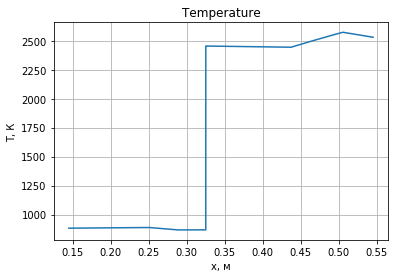

In [22]:
tochki = x[4394:16515]
davlen = T[4394:16515]
plt.title('Temperature')
plt.xlabel('x, м')
plt.ylabel('T, К')
plt.plot(np.array(tochki), np.array(davlen))
plt.grid(True)
plt.show()

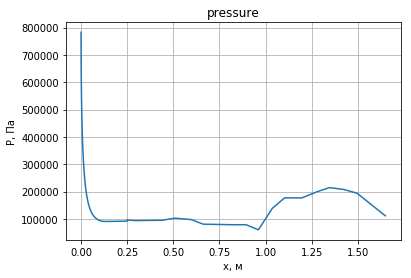

In [23]:
xnp = np.array(x)
plt.title('pressure')
plt.xlabel('x, м')
plt.ylabel('P, Па')
plt.plot(x[:49998], np.array(p[:49998]))
plt.grid(True)
plt.show()

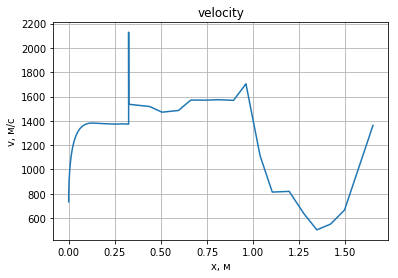

In [24]:
plt.title('velocity')
plt.xlabel('x, м')
plt.ylabel('v, м/с')
plt.plot(x[:49998], np.array(u[:49998]))
plt.grid(True)
plt.show()

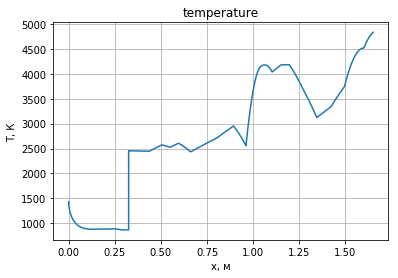

In [25]:
plt.title('temperature')
plt.plot(x[:49998], np.array(T[:49998]))
plt.xlabel('x, м')
plt.ylabel('T, К')
plt.grid(True)
plt.show()

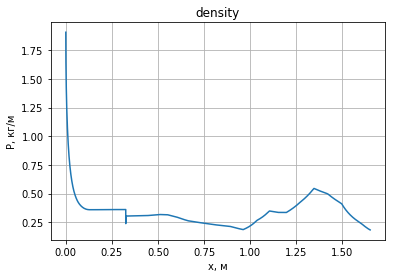

In [26]:
plt.title('density')
plt.plot(x[:49998], np.array(ro[:49998]))
plt.xlabel('x, м')
plt.ylabel('P, кг/м')
plt.grid(True)
plt.show()

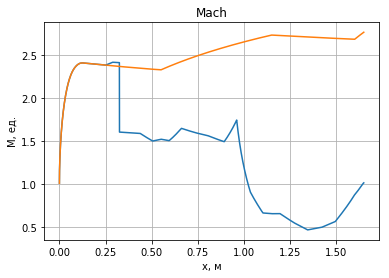

In [27]:
th_M = []
file = open("resm_th.txt")
for line in file:
    th_M.append(float(line))
file.close() 
plt.title('Mach')
plt.plot(x[:49998], np.array(M[:49998]))
plt.plot(x[:49998], np.array(th_M[:49998]))
plt.xlabel('x, м')
plt.ylabel('M, ед.')
plt.grid(True)
plt.show()

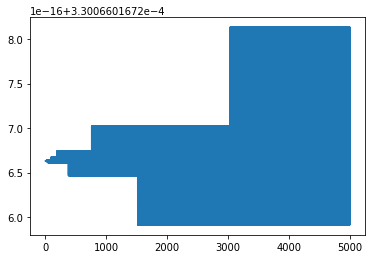

In [17]:
dx = []
for i in range(len(x) - 2):
    dx.append(x[i + 1] - x[i])
    
plt.plot(range(len(x) - 2), dx)
plt.show()

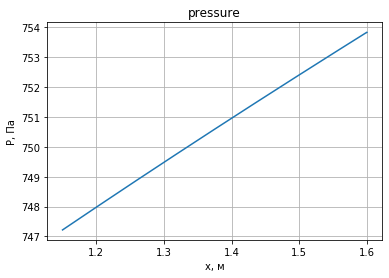

In [20]:
tochki = x[34849:48485]
davlen = T[34849:48485]
plt.title('pressure')
plt.xlabel('x, м')
plt.ylabel('P, Па')
plt.plot(np.array(tochki), np.array(davlen))
plt.grid(True)
plt.show()   

In [4]:
for i in range(len(p_data)):
    print(str(i) + " " + str(p_data[i]))

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 0.0
48 0.0
49 0.0
50 0.0
51 0.0
52 0.0
53 0.0
54 0.0
55 0.0
56 0.0
57 0.0
58 0.0
59 0.0
60 0.0
61 0.0
62 0.0
63 0.0
64 0.0
65 0.0
66 0.0
67 0.0
68 0.0
69 0.0
70 0.0
71 0.0
72 0.0
73 0.0
74 0.0
75 0.0
76 0.0
77 0.0
78 0.0
79 0.0
80 0.0
81 0.0
82 0.0
83 0.0
84 0.0
85 0.0
86 0.0
87 0.0
88 0.0
89 0.0
90 0.0
91 0.0
92 0.0
93 0.0
94 0.0
95 0.0
96 0.0
97 0.0
98 0.0
99 0.0
100 0.0
101 0.0
102 0.0
103 0.0
104 0.0
105 0.0
106 0.0
107 0.0
108 0.0
109 0.0
110 0.0
111 0.0
112 0.0
113 0.0
114 0.0
115 0.0
116 0.0
117 0.0
118 0.0
119 0.0
120 0.0
121 0.0
122 0.0
123 0.0
124 0.0
125 0.0
126 0.0
127 0.0
128 0.0
129 0.0
130 0.0
131 0.0
132 0.0
133 0.0
134 0.0
135 0.0
136 0.0
137 0.0
138 0.

2191 0.0
2192 0.0
2193 0.0
2194 0.0
2195 0.0
2196 0.0
2197 0.0
2198 0.0
2199 0.0
2200 0.0
2201 0.0
2202 0.0
2203 0.0
2204 0.0
2205 0.0
2206 0.0
2207 0.0
2208 0.0
2209 0.0
2210 0.0
2211 0.0
2212 0.0
2213 0.0
2214 0.0
2215 0.0
2216 0.0
2217 0.0
2218 0.0
2219 0.0
2220 0.0
2221 0.0
2222 0.0
2223 0.0
2224 0.0
2225 0.0
2226 0.0
2227 0.0
2228 0.0
2229 0.0
2230 0.0
2231 0.0
2232 0.0
2233 0.0
2234 0.0
2235 0.0
2236 0.0
2237 0.0
2238 0.0
2239 0.0
2240 0.0
2241 0.0
2242 0.0
2243 0.0
2244 0.0
2245 0.0
2246 0.0
2247 0.0
2248 0.0
2249 0.0
2250 0.0
2251 0.0
2252 0.0
2253 0.0
2254 0.0
2255 0.0
2256 0.0
2257 0.0
2258 0.0
2259 0.0
2260 0.0
2261 0.0
2262 0.0
2263 0.0
2264 0.0
2265 0.0
2266 0.0
2267 0.0
2268 0.0
2269 0.0
2270 0.0
2271 0.0
2272 0.0
2273 0.0
2274 0.0
2275 0.0
2276 0.0
2277 0.0
2278 0.0
2279 0.0
2280 0.0
2281 0.0
2282 0.0
2283 0.0
2284 0.0
2285 0.0
2286 0.0
2287 0.0
2288 0.0
2289 0.0
2290 0.0
2291 0.0
2292 0.0
2293 0.0
2294 0.0
2295 0.0
2296 0.0
2297 0.0
2298 0.0
2299 0.0
2300 0.0
2301 0.0
2

4190 0.0
4191 0.0
4192 0.0
4193 0.0
4194 0.0
4195 0.0
4196 0.0
4197 0.0
4198 0.0
4199 0.0
4200 0.0
4201 0.0
4202 0.0
4203 0.0
4204 0.0
4205 0.0
4206 0.0
4207 0.0
4208 0.0
4209 0.0
4210 0.0
4211 0.0
4212 0.0
4213 0.0
4214 0.0
4215 0.0
4216 0.0
4217 0.0
4218 0.0
4219 0.0
4220 0.0
4221 0.0
4222 0.0
4223 0.0
4224 0.0
4225 0.0
4226 0.0
4227 0.0
4228 0.0
4229 0.0
4230 0.0
4231 0.0
4232 0.0
4233 0.0
4234 0.0
4235 0.0
4236 0.0
4237 0.0
4238 0.0
4239 0.0
4240 0.0
4241 0.0
4242 0.0
4243 0.0
4244 0.0
4245 0.0
4246 0.0
4247 0.0
4248 0.0
4249 0.0
4250 0.0
4251 0.0
4252 0.0
4253 0.0
4254 0.0
4255 0.0
4256 0.0
4257 0.0
4258 0.0
4259 0.0
4260 0.0
4261 0.0
4262 0.0
4263 0.0
4264 0.0
4265 0.0
4266 0.0
4267 0.0
4268 0.0
4269 0.0
4270 0.0
4271 0.0
4272 0.0
4273 0.0
4274 0.0
4275 0.0
4276 0.0
4277 0.0
4278 0.0
4279 0.0
4280 0.0
4281 0.0
4282 0.0
4283 0.0
4284 0.0
4285 0.0
4286 0.0
4287 0.0
4288 0.0
4289 0.0
4290 0.0
4291 0.0
4292 0.0
4293 0.0
4294 0.0
4295 0.0
4296 0.0
4297 0.0
4298 0.0
4299 0.0
4300 0.0
4

6659 0.0
6660 0.0
6661 0.0
6662 0.0
6663 0.0
6664 0.0
6665 0.0
6666 0.0
6667 0.0
6668 0.0
6669 0.0
6670 0.0
6671 0.0
6672 0.0
6673 0.0
6674 0.0
6675 0.0
6676 0.0
6677 0.0
6678 0.0
6679 0.0
6680 0.0
6681 0.0
6682 0.0
6683 0.0
6684 0.0
6685 0.0
6686 0.0
6687 0.0
6688 0.0
6689 0.0
6690 0.0
6691 0.0
6692 0.0
6693 0.0
6694 0.0
6695 0.0
6696 0.0
6697 0.0
6698 0.0
6699 0.0
6700 0.0
6701 0.0
6702 0.0
6703 0.0
6704 0.0
6705 0.0
6706 0.0
6707 0.0
6708 0.0
6709 0.0
6710 0.0
6711 0.0
6712 0.0
6713 0.0
6714 0.0
6715 0.0
6716 0.0
6717 0.0
6718 0.0
6719 0.0
6720 0.0
6721 0.0
6722 0.0
6723 0.0
6724 0.0
6725 0.0
6726 0.0
6727 0.0
6728 0.0
6729 0.0
6730 0.0
6731 0.0
6732 0.0
6733 0.0
6734 0.0
6735 0.0
6736 0.0
6737 0.0
6738 0.0
6739 0.0
6740 0.0
6741 0.0
6742 0.0
6743 0.0
6744 0.0
6745 0.0
6746 0.0
6747 0.0
6748 0.0
6749 0.0
6750 0.0
6751 0.0
6752 0.0
6753 0.0
6754 0.0
6755 0.0
6756 0.0
6757 0.0
6758 0.0
6759 0.0
6760 0.0
6761 0.0
6762 0.0
6763 0.0
6764 0.0
6765 0.0
6766 0.0
6767 0.0
6768 0.0
6769 0.0
6

8189 0.9632406491739369
8190 0.9632158741511457
8191 0.9631910991283545
8192 0.9631663241055635
8193 0.9631415490827723
8194 0.9631167740599811
8195 0.9630919990371899
8196 0.9630672240143988
8197 0.9630424489916076
8198 0.9630176739688164
8199 0.9629928989460252
8200 0.962968123923234
8201 0.9629433489004429
8202 0.9629185738776518
8203 0.9628937988548606
8204 0.9628690238320694
8205 0.9628442488092782
8206 0.962819473786487
8207 0.9627946987636959
8208 0.9627699237409048
8209 0.9627451487181136
8210 0.9627203736953224
8211 0.9626955986725313
8212 0.96267082364974
8213 0.9626460486269489
8214 0.9626212736041577
8215 0.9625964985813665
8216 0.9625717235585753
8217 0.9625469485357843
8218 0.9625221735129931
8219 0.9624973984902019
8220 0.9624726234674107
8221 0.9624478484446196
8222 0.9624230734218284
8223 0.9623982983990372
8224 0.962373523376246
8225 0.9623487483534549
8226 0.9623239733306637
8227 0.9622991983078726
8228 0.9622744232850814
8229 0.9622496482622902
8230 0.96222487323949

10189 0.9546421761742546
10190 0.9546448448276561
10191 0.9546475134810576
10192 0.9546501821344591
10193 0.9546528507878606
10194 0.954655519441262
10195 0.9546581880946635
10196 0.9546608567480649
10197 0.9546635254014664
10198 0.9546661940548679
10199 0.9546688627082693
10200 0.9546715313616708
10201 0.9546742000150723
10202 0.9546768686684738
10203 0.9546795373218753
10204 0.9546822059752768
10205 0.9546848746286781
10206 0.9546875432820796
10207 0.9546902119354811
10208 0.9546928805888826
10209 0.9546955492422841
10210 0.9546982178956855
10211 0.954700886549087
10212 0.9547035552024885
10213 0.95470622385589
10214 0.9547088925092914
10215 0.9547115611626928
10216 0.9547142298160943
10217 0.9547168984694958
10218 0.9547195671228973
10219 0.9547222357762988
10220 0.9547249044297003
10221 0.9547275730831017
10222 0.9547302417365032
10223 0.9547329103899047
10224 0.9547355790433061
10225 0.9547382476967076
10226 0.954740916350109
10227 0.9547435850035105
10228 0.954746253656912
10229 

12188 0.9599768143237951
12189 0.9599794829771966
12190 0.9599821516305981
12191 0.9599848202839996
12192 0.959987488937401
12193 0.9599901575908025
12194 0.959992826244204
12195 0.9599954948976054
12196 0.9599981635510069
12197 0.9600008322044083
12198 0.9600035008578098
12199 0.9600061695112113
12200 0.9600088381646128
12201 0.9600115068180143
12202 0.9600141754714158
12203 0.9600168441248172
12204 0.9600195127782186
12205 0.9600221814316201
12206 0.9600248500850216
12207 0.9600275187384231
12208 0.9600301873918246
12209 0.960032856045226
12210 0.9600355246986275
12211 0.960038193352029
12212 0.9600408620054305
12213 0.960043530658832
12214 0.9600461993122333
12215 0.9600488679656348
12216 0.9600515366190363
12217 0.9600542052724378
12218 0.9600568739258393
12219 0.9600595425792408
12220 0.9600622112326422
12221 0.9600648798860437
12222 0.9600675485394452
12223 0.9600702171928466
12224 0.9600728858462481
12225 0.9600755544996495
12226 0.960078223153051
12227 0.9600808918064525
12228 

14188 1.0042268952305973
14189 1.0042707048204906
14190 1.004314514410384
14191 1.0043583240002774
14192 1.0044021335901707
14193 1.004445943180064
14194 1.0044897527699574
14195 1.0045335623598508
14196 1.0045773719497442
14197 1.0046211815396375
14198 1.004664991129531
14199 1.0047088007194243
14200 1.0047526103093176
14201 1.004796419899211
14202 1.0048402294891043
14203 1.0048840390789977
14204 1.004927848668891
14205 1.0049716582587844
14206 1.0050154678486778
14207 1.0050592774385712
14208 1.0051030870284645
14209 1.0051468966183579
14210 1.0051907062082512
14211 1.0052345157981446
14212 1.005278325388038
14213 1.0053221349779313
14214 1.0053659445678247
14215 1.0054097541577183
14216 1.0054535637476116
14217 1.005497373337505
14218 1.0055411829273984
14219 1.0055849925172917
14220 1.005628802107185
14221 1.0056726116970784
14222 1.0057164212869718
14223 1.0057602308768652
14224 1.0058040404667585
14225 1.005847850056652
14226 1.0058916596465453
14227 1.0059354692364386
14228 1.0

16187 1.0356556223211097
16188 1.0356359374272024
16189 1.035616252533295
16190 1.0355965676393875
16191 1.03557688274548
16192 1.0355571978515727
16193 1.0355375129576654
16194 1.035517828063758
16195 1.0354981431698507
16196 1.0354784582759433
16197 1.035458773382036
16198 1.0354390884881284
16199 1.035419403594221
16200 1.0353997187003137
16201 1.0353800338064063
16202 1.035360348912499
16203 1.0353406640185916
16204 1.0353209791246842
16205 1.0353012942307767
16206 1.0352816093368693
16207 1.035261924442962
16208 1.0352422395490546
16209 1.0352225546551472
16210 1.0352028697612399
16211 1.0351831848673325
16212 1.0351634999734252
16213 1.0351438150795176
16214 1.0351241301856102
16215 1.0351044452917029
16216 1.0350847603977955
16217 1.0350650755038882
16218 1.0350453906099808
16219 1.0350257057160734
16220 1.0350060208221659
16221 1.0349863359282585
16222 1.0349666510343511
16223 1.0349469661404438
16224 1.0349272812465364
16225 1.034907596352629
16226 1.0348879114587215
16227 1.0

18187 0.9846860224274158
18188 0.9845924805555826
18189 0.9844989386837497
18190 0.9844053968119165
18191 0.9843118549400837
18192 0.9842183130682506
18193 0.9841247711964174
18194 0.9840312293245845
18195 0.9839376874527513
18196 0.9838441455809185
18197 0.9837506037090853
18198 0.9836570618372525
18199 0.9835635199654194
18200 0.9834699780935865
18201 0.9833764362217533
18202 0.9832828943499204
18203 0.9831893524780873
18204 0.9830958106062544
18205 0.9830022687344213
18206 0.9829087268625881
18207 0.9828151849907553
18208 0.9827216431189221
18209 0.9826281012470892
18210 0.9825345593752561
18211 0.9824410175034233
18212 0.9823474756315901
18213 0.9822539337597572
18214 0.982160391887924
18215 0.9820668500160912
18216 0.9819733081442581
18217 0.9818797662724252
18218 0.981786224400592
18219 0.9816926825287592
18220 0.981599140656926
18221 0.9815055987850928
18222 0.98141205691326
18223 0.9813185150414269
18224 0.981224973169594
18225 0.9811314312977608
18226 0.981037889425928
18227 0

19895 0.8249165053366182
19896 0.824822963464785
19897 0.8247294215929519
19898 0.8246358797211191
19899 0.8245423378492859
19900 0.824448795977453
19901 0.8243552541056198
19902 0.824261712233787
19903 0.8241681703619539
19904 0.824074628490121
19905 0.8239810866182878
19906 0.823887544746455
19907 0.8237940028746218
19908 0.8237004610027889
19909 0.8236069191309559
19910 0.8235133772591227
19911 0.8234198353872898
19912 0.8233262935154566
19913 0.8232327516436238
19914 0.8231392097717907
19915 0.8230456678999578
19916 0.8229521260281246
19917 0.8228585841562918
19918 0.8227650422844586
19919 0.8226715004126257
19920 0.8225779585407925
19921 0.8224844166689598
19922 0.8223908747971266
19923 0.8222973329252934
19924 0.8222037910534605
19925 0.8221102491816273
19926 0.8220167073097945
19927 0.8219231654379613
19928 0.8218296235661284
19929 0.8217360816942954
19930 0.8216425398224625
19931 0.8215489979506293
19932 0.8214554560787964
19933 0.8213619142069633
19934 0.8212683723351304
19935

22186 0.7555232187203966
22187 0.7554968867601438
22188 0.755470554799891
22189 0.7554442228396382
22190 0.7554178908793855
22191 0.7553915589191327
22192 0.7553652269588798
22193 0.755338894998627
22194 0.7553125630383742
22195 0.7552862310781214
22196 0.7552598991178686
22197 0.7552335671576159
22198 0.7552072351973631
22199 0.7551809032371103
22200 0.7551545712768575
22201 0.7551282393166047
22202 0.7551019073563519
22203 0.7550755753960992
22204 0.7550492434358463
22205 0.7550229114755934
22206 0.7549965795153407
22207 0.7549702475550879
22208 0.7549439155948351
22209 0.7549175836345823
22210 0.7548912516743296
22211 0.7548649197140768
22212 0.754838587753824
22213 0.7548122557935711
22214 0.7547859238333184
22215 0.7547595918730655
22216 0.7547332599128128
22217 0.75470692795256
22218 0.7546805959923072
22219 0.7546542640320544
22220 0.7546279320718016
22221 0.7546016001115488
22222 0.7545752681512959
22223 0.7545489361910432
22224 0.7545226042307904
22225 0.7544962722705376
22226

24185 0.8396166274847663
24186 0.8396629314337262
24187 0.8397092353826859
24188 0.8397555393316459
24189 0.8398018432806057
24190 0.8398481472295656
24191 0.8398944511785253
24192 0.8399407551274853
24193 0.8399870590764451
24194 0.840033363025405
24195 0.8400796669743648
24196 0.8401259709233247
24197 0.8401722748722846
24198 0.8402185788212444
24199 0.8402648827702044
24200 0.8403111867191642
24201 0.840357490668124
24202 0.8404037946170838
24203 0.8404500985660438
24204 0.8404964025150036
24205 0.8405427064639635
24206 0.8405890104129232
24207 0.8406353143618832
24208 0.840681618310843
24209 0.840727922259803
24210 0.8407742262087629
24211 0.8408205301577226
24212 0.8408668341066825
24213 0.8409131380556423
24214 0.8409594420046023
24215 0.841005745953562
24216 0.841052049902522
24217 0.8410983538514818
24218 0.8411446578004417
24219 0.8411909617494014
24220 0.8412372656983614
24221 0.8412835696473212
24222 0.8413298735962811
24223 0.8413761775452411
24224 0.8414224814942008
24225 

26403 0.7977547790943336
26404 0.7977312505401788
26405 0.7977077219860239
26406 0.7976841934318691
26407 0.7976606648777143
26408 0.7976371363235595
26409 0.7976136077694046
26410 0.7975900792152497
26411 0.7975665506610949
26412 0.7975430221069401
26413 0.7975194935527852
26414 0.7974959649986304
26415 0.7974724364444755
26416 0.7974489078903207
26417 0.7974253793361659
26418 0.7974018507820111
26419 0.7973783222278562
26420 0.7973547936737013
26421 0.7973312651195466
26422 0.7973077365653917
26423 0.7972842080112369
26424 0.797260679457082
26425 0.7972371509029271
26426 0.7972136223487724
26427 0.7971900937946175
26428 0.7971665652404627
26429 0.7971430366863078
26430 0.797119508132153
26431 0.7970959795779982
26432 0.7970724510238434
26433 0.7970489224696885
26434 0.7970253939155337
26435 0.7970018653613788
26436 0.7969783368072241
26437 0.7969548082530692
26438 0.7969312796989143
26439 0.7969077511447595
26440 0.7968842225906047
26441 0.7968606940364499
26442 0.796837165482295
264

28184 0.6661972944671612
28185 0.6660939987604417
28186 0.6659907030537225
28187 0.6658874073470029
28188 0.6657841116402837
28189 0.6656808159335641
28190 0.6655775202268449
28191 0.6654742245201253
28192 0.6653709288134061
28193 0.6652676331066866
28194 0.6651643373999669
28195 0.6650610416932478
28196 0.6649577459865281
28197 0.6648544502798089
28198 0.6647511545730893
28199 0.6646478588663701
28200 0.6645445631596506
28201 0.6644412674529313
28202 0.6643379717462118
28203 0.6642346760394926
28204 0.664131380332773
28205 0.6640280846260538
28206 0.6639247889193342
28207 0.6638214932126146
28208 0.6637181975058954
28209 0.6636149017991758
28210 0.6635116060924566
28211 0.663408310385737
28212 0.6633050146790178
28213 0.6632017189722982
28214 0.663098423265579
28215 0.6629951275588595
28216 0.6628918318521402
28217 0.6627885361454207
28218 0.6626852404387014
28219 0.6625819447319818
28220 0.6624786490252622
28221 0.662375353318543
28222 0.6622720576118235
28223 0.6621687619051042
2822

29467 0.5736035273469264
29468 0.5736155261343271
29469 0.5736275249217279
29470 0.5736395237091286
29471 0.5736515224965294
29472 0.5736635212839302
29473 0.5736755200713309
29474 0.5736875188587316
29475 0.5736995176461324
29476 0.5737115164335331
29477 0.5737235152209339
29478 0.5737355140083346
29479 0.5737475127957354
29480 0.5737595115831362
29481 0.5737715103705369
29482 0.5737835091579376
29483 0.5737955079453384
29484 0.5738075067327392
29485 0.5738195055201398
29486 0.5738315043075406
29487 0.5738435030949414
29488 0.5738555018823421
29489 0.5738675006697429
29490 0.5738794994571437
29491 0.5738914982445443
29492 0.5739034970319451
29493 0.5739154958193459
29494 0.5739274946067466
29495 0.5739394933941474
29496 0.5739514921815482
29497 0.5739634909689489
29498 0.5739754897563496
29499 0.5739874885437504
29500 0.5739994873311511
29501 0.5740114861185519
29502 0.5740234849059527
29503 0.5740354836933534
29504 0.5740474824807541
29505 0.5740594812681549
29506 0.5740714800555556


31683 0.5982108961406251
31684 0.5982167011832583
31685 0.5982225062258916
31686 0.5982283112685248
31687 0.598234116311158
31688 0.5982399213537912
31689 0.5982457263964245
31690 0.5982515314390576
31691 0.5982573364816909
31692 0.5982631415243241
31693 0.5982689465669574
31694 0.5982747516095905
31695 0.5982805566522238
31696 0.598286361694857
31697 0.5982921667374903
31698 0.5982979717801234
31699 0.5983037768227567
31700 0.59830958186539
31701 0.5983153869080231
31702 0.5983211919506564
31703 0.5983269969932896
31704 0.5983328020359229
31705 0.598338607078556
31706 0.5983444121211893
31707 0.5983502171638225
31708 0.5983560222064558
31709 0.5983618272490889
31710 0.5983676322917222
31711 0.5983734373343554
31712 0.5983792423769886
31713 0.5983850474196218
31714 0.5983908524622551
31715 0.5983966575048884
31716 0.5984024625475215
31717 0.5984082675901548
31718 0.598414072632788
31719 0.5984198776754213
31720 0.5984256827180544
31721 0.5984314877606877
31722 0.5984372928033209
31723 

33892 0.6100851526585767
33893 0.6100889315928912
33894 0.6100927105272058
33895 0.6100964894615203
33896 0.6101002683958349
33897 0.6101040473301494
33898 0.610107826264464
33899 0.6101116051987786
33900 0.6101153841330932
33901 0.6101191630674077
33902 0.6101229420017222
33903 0.6101267209360368
33904 0.6101304998703514
33905 0.6101342788046659
33906 0.6101380577389804
33907 0.610141836673295
33908 0.6101456156076096
33909 0.6101493945419242
33910 0.6101531734762387
33911 0.6101569524105532
33912 0.6101607313448678
33913 0.6101645102791824
33914 0.610168289213497
33915 0.6101720681478116
33916 0.610175847082126
33917 0.6101796260164406
33918 0.6101834049507552
33919 0.6101871838850698
33920 0.6101909628193843
33921 0.6101947417536988
33922 0.6101985206880134
33923 0.610202299622328
33924 0.6102060785566426
33925 0.610209857490957
33926 0.6102136364252716
33927 0.6102174153595862
33928 0.6102211942939008
33929 0.6102249732282153
33930 0.6102287521625299
33931 0.6102325310968444
33932 

35682 0.6168494450816361
35683 0.6168532240159507
35684 0.6168570029502652
35685 0.6168607818845798
35686 0.6168645608188944
35687 0.6168683397532089
35688 0.6168721186875235
35689 0.616875897621838
35690 0.6168796765561526
35691 0.6168834554904672
35692 0.6168872344247818
35693 0.6168910133590962
35694 0.6168947922934108
35695 0.6168985712277254
35696 0.61690235016204
35697 0.6169061290963546
35698 0.616909908030669
35699 0.6169136869649836
35700 0.6169174658992982
35701 0.6169212448336128
35702 0.6169250237679272
35703 0.6169288027022418
35704 0.6169325816365564
35705 0.616936360570871
35706 0.6169401395051856
35707 0.6169439184395001
35708 0.6169476973738146
35709 0.6169514763081292
35710 0.6169552552424438
35711 0.6169590341767583
35712 0.6169628131110729
35713 0.6169665920453874
35714 0.616970370979702
35715 0.6169741499140166
35716 0.6169779288483311
35717 0.6169817077826457
35718 0.6169854867169603
35719 0.6169892656512748
35720 0.6169930445855893
35721 0.6169968235199039
35722 

37511 0.597025842965842
37512 0.5970090500298046
37513 0.5969922570937671
37514 0.5969754641577296
37515 0.5969586712216922
37516 0.5969418782856547
37517 0.5969250853496173
37518 0.5969082924135799
37519 0.5968914994775425
37520 0.5968747065415049
37521 0.5968579136054675
37522 0.5968411206694301
37523 0.5968243277333927
37524 0.5968075347973552
37525 0.5967907418613178
37526 0.5967739489252802
37527 0.5967571559892427
37528 0.5967403630532053
37529 0.5967235701171679
37530 0.5967067771811305
37531 0.596689984245093
37532 0.5966731913090555
37533 0.5966563983730181
37534 0.5966396054369807
37535 0.5966228125009432
37536 0.5966060195649058
37537 0.5965892266288684
37538 0.5965724336928309
37539 0.5965556407567933
37540 0.596538847820756
37541 0.5965220548847185
37542 0.596505261948681
37543 0.5964884690126435
37544 0.5964716760766061
37545 0.5964548831405687
37546 0.5964380902045312
37547 0.5964212972684938
37548 0.5964045043324564
37549 0.5963877113964189
37550 0.5963709184603814
3755

39138 0.574485110432834
39139 0.5744756293431114
39140 0.5744661482533886
39141 0.574456667163666
39142 0.5744471860739433
39143 0.5744377049842205
39144 0.5744282238944978
39145 0.5744187428047751
39146 0.5744092617150525
39147 0.5743997806253298
39148 0.574390299535607
39149 0.5743808184458843
39150 0.5743713373561616
39151 0.574361856266439
39152 0.5743523751767162
39153 0.5743428940869936
39154 0.5743334129972708
39155 0.574323931907548
39156 0.5743144508178254
39157 0.5743049697281027
39158 0.57429548863838
39159 0.5742860075486572
39160 0.5742765264589346
39161 0.5742670453692119
39162 0.5742575642794893
39163 0.5742480831897665
39164 0.5742386021000437
39165 0.5742291210103211
39166 0.5742196399205983
39167 0.5742101588308757
39168 0.574200677741153
39169 0.5741911966514303
39170 0.5741817155617075
39171 0.5741722344719848
39172 0.5741627533822622
39173 0.5741532722925394
39174 0.5741437912028168
39175 0.574134310113094
39176 0.5741248290233714
39177 0.5741153479336487
39178 0.5

41050 0.5703513327043177
41051 0.5703895738695481
41052 0.5704278150347785
41053 0.5704660562000087
41054 0.5705042973652392
41055 0.5705425385304694
41056 0.5705807796956996
41057 0.5706190208609299
41058 0.5706572620261604
41059 0.5706955031913906
41060 0.5707337443566209
41061 0.5707719855218512
41062 0.5708102266870816
41063 0.5708484678523119
41064 0.5708867090175421
41065 0.5709249501827727
41066 0.5709631913480029
41067 0.5710014325132331
41068 0.5710396736784633
41069 0.5710779148436939
41070 0.5711161560089241
41071 0.5711543971741543
41072 0.5711926383393846
41073 0.571230879504615
41074 0.5712691206698454
41075 0.5713073618350756
41076 0.5713456030003058
41077 0.5713838441655363
41078 0.5714220853307665
41079 0.5714603264959968
41080 0.5714985676612273
41081 0.5715368088264575
41082 0.5715750499916877
41083 0.5716132911569181
41084 0.5716515323221485
41085 0.5716897734873788
41086 0.571728014652609
41087 0.5717662558178392
41088 0.5718044969830698
41089 0.5718427381483
41090

43063 0.6451358945507432
43064 0.6451087295071531
43065 0.645081564463563
43066 0.6450543994199731
43067 0.6450272343763831
43068 0.6450000693327932
43069 0.6449729042892031
43070 0.6449457392456132
43071 0.6449185742020231
43072 0.644891409158433
43073 0.6448642441148431
43074 0.6448370790712532
43075 0.6448099140276632
43076 0.6447827489840731
43077 0.6447555839404832
43078 0.6447284188968933
43079 0.6447012538533032
43080 0.6446740888097131
43081 0.6446469237661232
43082 0.6446197587225332
43083 0.6445925936789433
43084 0.6445654286353532
43085 0.6445382635917632
43086 0.6445110985481732
43087 0.6444839335045831
43088 0.6444567684609932
43089 0.6444296034174033
43090 0.6444024383738133
43091 0.6443752733302232
43092 0.6443481082866332
43093 0.6443209432430433
43094 0.6442937781994533
43095 0.6442666131558632
43096 0.6442394481122733
43097 0.6442122830686833
43098 0.6441851180250932
43099 0.6441579529815032
43100 0.6441307879379133
43101 0.6441036228943233
43102 0.6440764578507332
43

44723 0.6000419221913528
44724 0.6000147571477628
44725 0.5999875921041729
44726 0.5999604270605827
44727 0.5999332620169928
44728 0.5999060969734028
44729 0.5998789319298129
44730 0.5998517668862228
44731 0.5998246018426328
44732 0.5997974367990428
44733 0.5997702717554529
44734 0.5997431067118628
44735 0.5997159416682728
44736 0.5996887766246829
44737 0.5996616115810928
44738 0.5996344465375029
44739 0.5996072814939128
44740 0.5995801164503229
44741 0.5995529514067328
44742 0.5995257863631429
44743 0.5994986213195529
44744 0.599471456275963
44745 0.5994442912323729
44746 0.599417126188783
44747 0.5993899611451929
44748 0.5993627961016028
44749 0.5993356310580129
44750 0.5993084660144229
44751 0.599281300970833
44752 0.5992541359272429
44753 0.599226970883653
44754 0.5991998058400629
44755 0.599172640796473
44756 0.5991454757528829
44757 0.599118310709293
44758 0.599091145665703
44759 0.5990639806221131
44760 0.599036815578523
44761 0.599009650534933
44762 0.598982485491343
44763 0.59

46679 0.5686331930255909
46680 0.5686218072477542
46681 0.5686104214699174
46682 0.5685990356920807
46683 0.5685876499142439
46684 0.5685762641364073
46685 0.5685648783585705
46686 0.5685534925807337
46687 0.5685421068028971
46688 0.5685307210250602
46689 0.5685193352472235
46690 0.5685079494693868
46691 0.5684965636915501
46692 0.5684851779137133
46693 0.5684737921358766
46694 0.5684624063580399
46695 0.5684510205802031
46696 0.5684396348023664
46697 0.5684282490245296
46698 0.5684168632466929
46699 0.5684054774688562
46700 0.5683940916910194
46701 0.5683827059131827
46702 0.568371320135346
46703 0.5683599343575092
46704 0.5683485485796724
46705 0.5683371628018358
46706 0.568325777023999
46707 0.5683143912461622
46708 0.5683030054683255
46709 0.5682916196904888
46710 0.568280233912652
46711 0.5682688481348153
46712 0.5682574623569786
46713 0.5682460765791418
46714 0.5682346908013052
46715 0.5682233050234683
46716 0.5682119192456316
46717 0.5682005334677949
46718 0.5681891476899581
467

48854 0.5438691262306865
48855 0.5438577404528497
48856 0.5438463546750131
48857 0.5438349688971763
48858 0.5438235831193396
48859 0.5438121973415028
48860 0.5438008115636661
48861 0.5437894257858293
48862 0.5437780400079927
48863 0.5437666542301558
48864 0.5437552684523191
48865 0.5437438826744824
48866 0.5437324968966456
48867 0.5437211111188089
48868 0.5437097253409722
48869 0.5436983395631355
48870 0.5436869537852986
48871 0.543675568007462
48872 0.5436641822296252
48873 0.5436527964517885
48874 0.5436414106739518
48875 0.543630024896115
48876 0.5436186391182783
48877 0.5436072533404415
48878 0.5435958675626048
48879 0.543584481784768
48880 0.5435730960069314
48881 0.5435617102290946
48882 0.5435503244512578
48883 0.5435389386734212
48884 0.5435275528955844
48885 0.5435161671177476
48886 0.5435047813399109
48887 0.5434933955620742
48888 0.5434820097842374
48889 0.5434706240064007
48890 0.5434592382285639
48891 0.5434478524507272
48892 0.5434364666728905
48893 0.5434250808950537
488